# Removendo Outliers

#### Método IQR (Variação Interquartil)

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Gerando valores
Dados = pd.Series([29, 27, 33, 31, 29, 30, 34, 1, 1, 100, 1000])
pd.DataFrame
Dados

0       29
1       27
2       33
3       31
4       29
5       30
6       34
7        1
8        1
9      100
10    1000
dtype: int64

<AxesSubplot:>

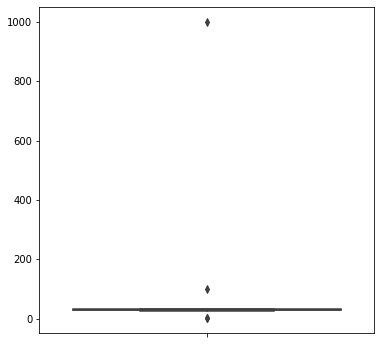

In [3]:
# Plotando Boxplot para demostrar a presença dos Outliers
plt.figure(figsize=(6,6))
sns.boxplot(y=Dados)

In [4]:
# Lendo os dados estatísticos e colocando-os em uma variável
Dados_Estatistico = Dados.describe()
Dados_Estatistico

count      11.000000
mean      119.545455
std       293.141046
min         1.000000
25%        28.000000
50%        30.000000
75%        33.500000
max      1000.000000
dtype: float64

In [5]:
# Transformandp dados estatísticos em um dataframe
Analise = pd.DataFrame(Dados_Estatistico)
Analise

,0
count,11.000000
mean,119.545455
std,293.141046
min,1.000000
25%,28.000000
50%,30.000000
75%,33.500000
max,1000.000000


In [6]:
Analise.rename(columns={0:'Dados Estatisticos'}, inplace=True)
Analise

,Dados Estatisticos
count,11.000000
mean,119.545455
std,293.141046
min,1.000000
25%,28.000000
50%,30.000000
75%,33.500000
max,1000.000000


In [7]:
# Identificar primeiro quartil
Q1 = np.percentile(Dados, 25)
Q1

28.0

In [8]:
# Identificar terceiro quartil
Q3 = np.percentile(Dados, 75)
Q3

33.5

In [9]:
# Calculo do IRQ (Variação interquartil)
IQR = Q3 - Q1
IQR

5.5

In [10]:
# Calcular a linha de corte
Corte = IQR * 1.5

In [11]:
# Calcular os extremos Menor
Menor = Q1 - Corte
Menor

19.75

In [12]:
# Calcular os extremos Maior
Maior = Q3 + Corte
Maior

41.75

In [13]:
# Identificando os valores foa do cojunto de dados
Outliers = Dados[(Dados<Menor) | (Dados>Maior)].index
Outliers

Int64Index([7, 8, 9, 10], dtype='int64')

In [14]:
# Removendo os valores que foram identificados como outliers
Dados_Sem_Outliers = Dados.drop(Outliers)
Dados_Sem_Outliers

0    29
1    27
2    33
3    31
4    29
5    30
6    34
dtype: int64

<AxesSubplot:>

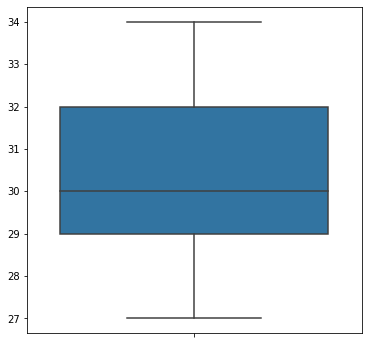

In [15]:
# Plotando o conjunto sem outliers
plt.figure(figsize=(6,6))
sns.boxplot(y=Dados_Sem_Outliers)